# Flight delay prediction EDA and Machine learning
This project aims to predict flight delays for flights from Washington, DC to New York City using
machine learning. The project uses a dataset of flight records from
January 2004. 

### Variable Dictionary
1) *Origin -*
   - DCA - Reagan National 
   - IAD - Dulles
   - BWI - Baltimore–Washington Int’l

2) *Destination -*
   -  JFK - Kennedy
   -  LGA - LaGuardia
   -  EWR - Newark

3) *Carrier -*
   -  CO - Continental
   -  DH - Atlantic Coast
   -  DL - Delta
   -  MQ - American Eagle
   -  OH - Comair
   -  RU - Continental Express
   -  UA - United
   -  US - USAirways



---


#### Importing necessary libraries

In [2]:
import pandas as pd
import altair as alt
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data

In [3]:
df=pd.read_excel('D:\python\Cfa maths and stats\\assignment 1a\Flight Data.xlsx',parse_dates=['Date'])

In [4]:
df.head()

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,1455,JFK,184,2004-01-01,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,2004-01-01,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,2004-01-01,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,2004-01-01,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,2004-01-01,7792,IAD,4,1,ontime


In [5]:
df.tail()

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
2194,RU,644,EWR,199,2004-01-31,2761,DCA,6,31,ontime
2195,RU,1653,EWR,213,2004-01-31,2497,IAD,6,31,ontime
2196,RU,1558,EWR,199,2004-01-31,2361,DCA,6,31,ontime
2197,RU,1403,EWR,199,2004-01-31,2216,DCA,6,31,ontime
2198,RU,1736,EWR,199,2004-01-31,2097,DCA,6,31,ontime


#### Getting shape of the dataframe

In [6]:
df.shape

(2199, 10)

This dataset consist of `2199` rows and `10` columns.

----

#### Getting column names

In [7]:
df.columns

Index(['Carrier', 'Departure Time', 'Destination', 'Distance', 'Date',
       'Flight Number', 'Origin', 'Day of the Week', 'Day of the Month',
       'Delayed '],
      dtype='object')

----
#### Checking for duplicated values

In [8]:
df.duplicated().sum()

0

There aren't any duplicated cells.

----

#### Checking for null values

In [9]:
df.isna().sum()

Carrier             0
Departure Time      0
Destination         0
Distance            0
Date                0
Flight Number       0
Origin              0
Day of the Week     0
Day of the Month    0
Delayed             0
dtype: int64

Looks like there aren't any null values across the dataframe.

-----

#### Getting overall info of each variable

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Carrier           2199 non-null   object        
 1   Departure Time    2199 non-null   int64         
 2   Destination       2199 non-null   object        
 3   Distance          2199 non-null   int64         
 4   Date              2199 non-null   datetime64[ns]
 5   Flight Number     2199 non-null   int64         
 6   Origin            2199 non-null   object        
 7   Day of the Week   2199 non-null   int64         
 8   Day of the Month  2199 non-null   int64         
 9   Delayed           2199 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 171.9+ KB


In [11]:
pd.DataFrame({'unique':df.nunique(),
              'null': df.isna().sum()/df.count(),
              'dtype':df.dtypes})

,unique,null,dtype
Carrier,8,0.0,object
Departure Time,631,0.0,int64
Destination,3,0.0,object
Distance,7,0.0,int64
Date,31,0.0,datetime64[ns]
Flight Number,103,0.0,int64
Origin,3,0.0,object
Day of the Week,7,0.0,int64
Day of the Month,31,0.0,int64
Delayed,2,0.0,object


----
#### Statistical Description

In [12]:
df.describe()

,Departure Time,Distance,Flight Number,Day of the Week,Day of the Month
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,1370.490223,211.855844,3811.567531,3.906321,16.020464
std,440.893123,13.312840,2408.017328,1.902862,8.679829
min,548.000000,169.000000,746.000000,1.000000,1.000000
25%,1011.000000,213.000000,2156.000000,2.000000,8.000000
50%,1450.000000,214.000000,2385.000000,4.000000,16.000000
75%,1709.000000,214.000000,5935.000000,5.000000,23.000000
max,2330.000000,229.000000,7924.000000,7.000000,31.000000


----
#### Correaltion


In [13]:
correlation=df.corr()
correlation

,Departure Time,Distance,Flight Number,Day of the Week,Day of the Month
Departure Time,1.000000,0.061436,0.110557,0.050713,0.001659
Distance,0.061436,1.000000,0.420868,-0.020397,0.009459
Flight Number,0.110557,0.420868,1.000000,0.019334,-0.010119
Day of the Week,0.050713,-0.020397,0.019334,1.000000,0.015955
Day of the Month,0.001659,0.009459,-0.010119,0.015955,1.000000


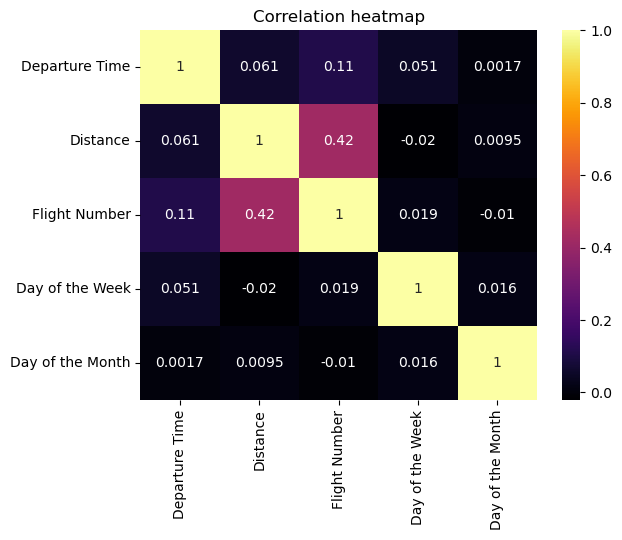

In [14]:
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,cmap='inferno')
plt.show()


----

Distribution of `Carrier` variable

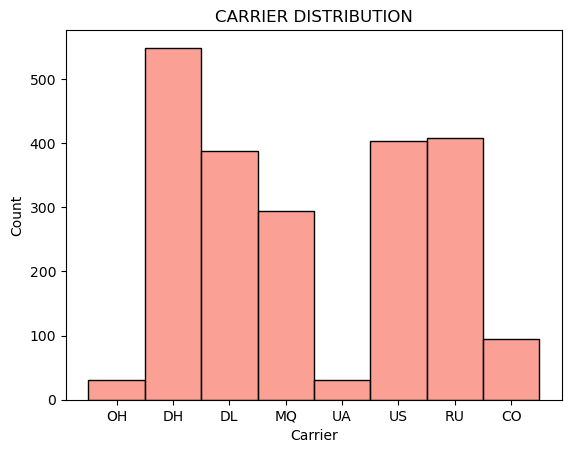

In [15]:
carrier_count=df['Carrier'].value_counts()
plt.title('CARRIER DISTRIBUTION')
sns.histplot(data=df,x='Carrier',color='salmon')
plt.show()

- `DH` is the most frequent carrier in this dataset.
- `OH` and `UA` are the least frequented carriers in this dataset.

Distribution of `Departure Time` and `Distance` variable

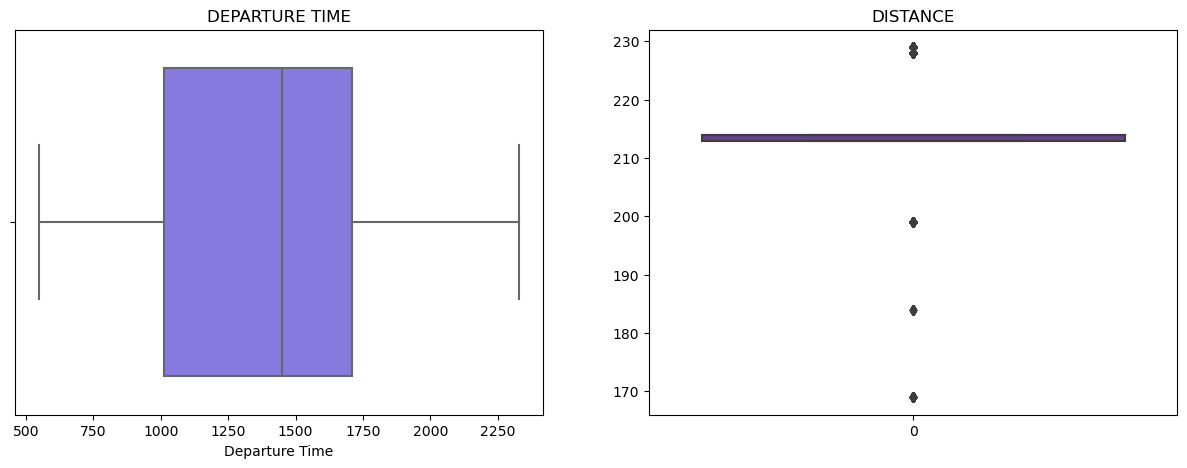

In [16]:
#Setting figure size
plt.figure(figsize=(15,5))

#Departure time
plt.subplot(1,2,1)
plt.title('DEPARTURE TIME')
sns.boxplot(data=df,x='Departure Time',color='mediumslateblue')

#Distance
plt.subplot(1,2,2)
plt.title('DISTANCE')
sns.boxplot(df['Distance'],color='rebeccapurple')

plt.show()

Distribution of `Day of the Week` and `Day of the Month` variable

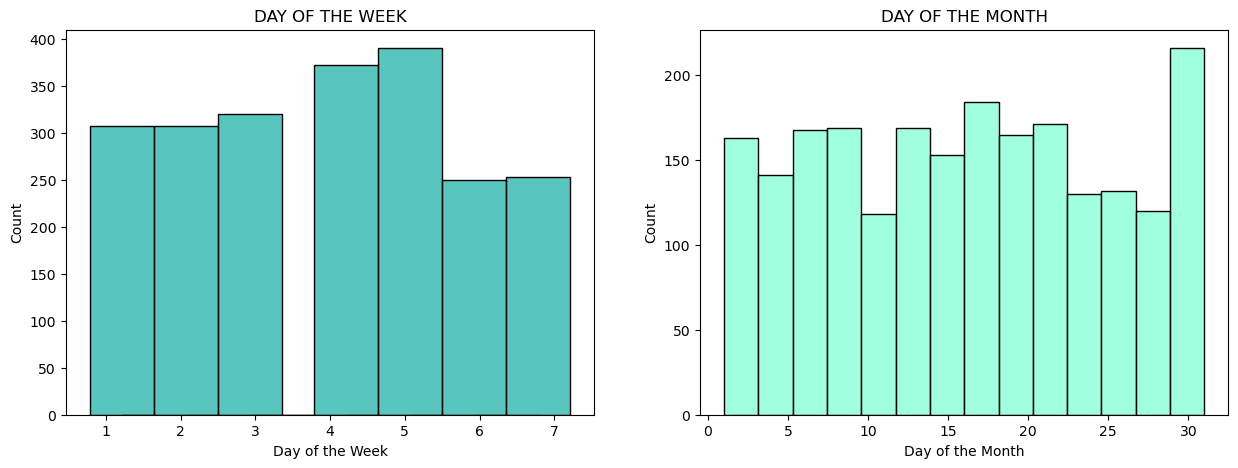

In [18]:
#setting figure size
plt.figure(figsize=(15,5))

#Day of the week
plt.subplot(1,2,1)
plt.title('DAY OF THE WEEK')
sns.histplot(data=df,x='Day of the Week',shrink=2,color='lightseagreen')

#Day of the month
plt.subplot(1,2,2)
plt.title('DAY OF THE MONTH')
sns.histplot(data=df,x='Day of the Month',color='aquamarine')

plt.show()

Distribution of `Origin` and `Destination` variable

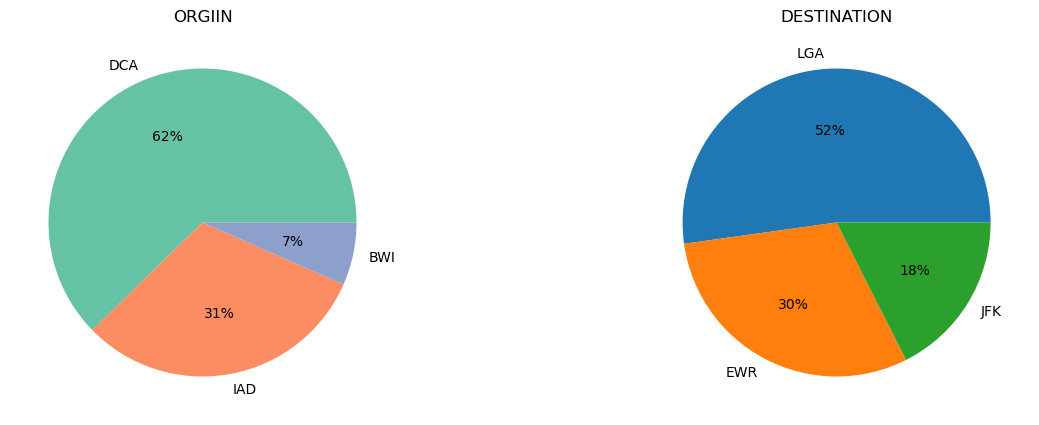

In [19]:
#setting figure sizev
plt.figure(figsize=(15,5))

#Orgin
plt.subplot(1,2,1)
orgin_count=df['Origin'].value_counts()
plt.title('ORGIIN')
color=sns.color_palette('Set2')
plt.pie(x=orgin_count.values,labels=orgin_count.index,autopct='%.0f%%',colors=color)

#Destination
plt.subplot(1,2,2)
destination_count=df['Destination'].value_counts()
plt.title('DESTINATION')
plt.pie(x=destination_count.values,labels=destination_count.index,autopct='%.0f%%')

plt.show()

Distribution of `Delayed` variable

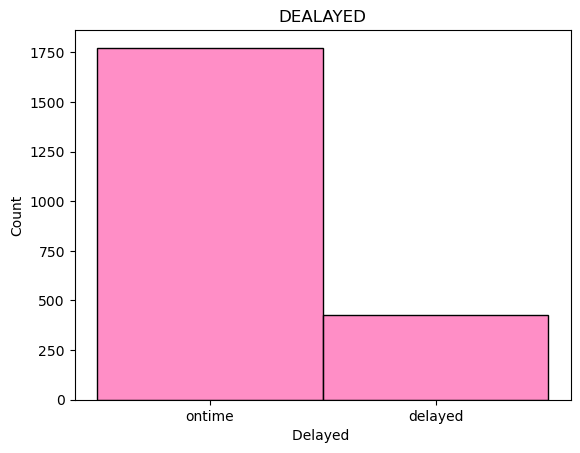

In [20]:
plt.title('DEALAYED')
sns.histplot(data=df,x='Delayed ',color='hotpink')
plt.show()

The "ontime" class is more frequent than the "delayed" class in this variable

----

DELAY BASED ON CARRIER

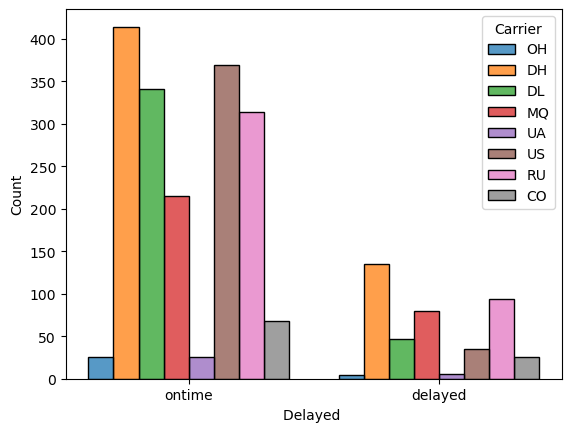

In [21]:
sns.histplot(data=df,x='Delayed ',hue='Carrier', multiple="dodge", shrink=.8)
plt.show()

`DH (Atlantic Coast)` carrier had the most number of flights both on time and delayed.

----

#### Delay based on Day of the week 

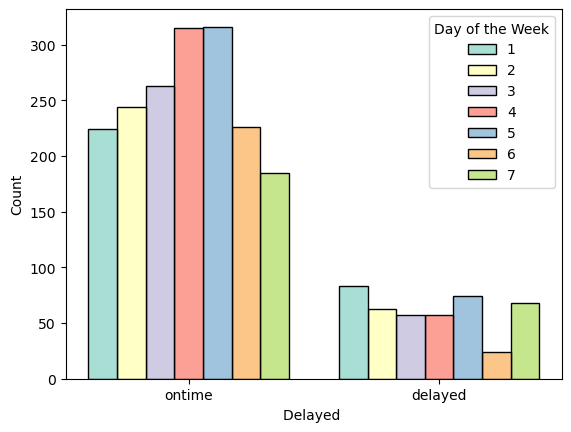

In [22]:
sns.histplot(data=df,x='Delayed ',hue='Day of the Week', multiple="dodge", shrink=.8,palette='Set3')
plt.show()

- During `Friday` and `Thursday`, most of the flights were on time.
- During `Monday`, most of the flights were delayed.

---

#### Delay based on origin

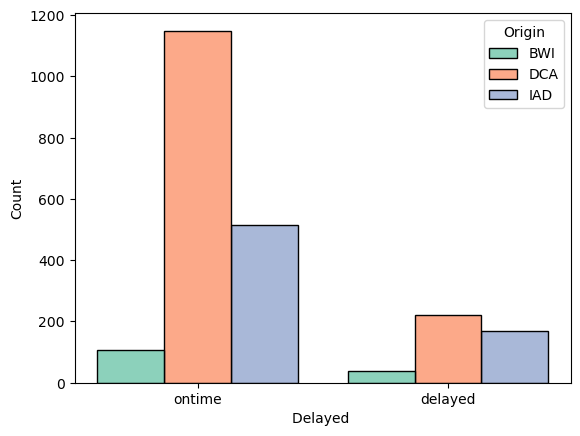

In [23]:
sns.histplot(data=df,x='Delayed ',hue='Origin', multiple='dodge',shrink=.8,palette='Set2')
plt.show()

- The flights having origin `BWI (Baltimore–Washington Int’l)` were mostly both on time and delayed followed by flights having origin `IAD (Dulles)` and `DCA (Reagan National)`.
--- 

#### Delay based on destination

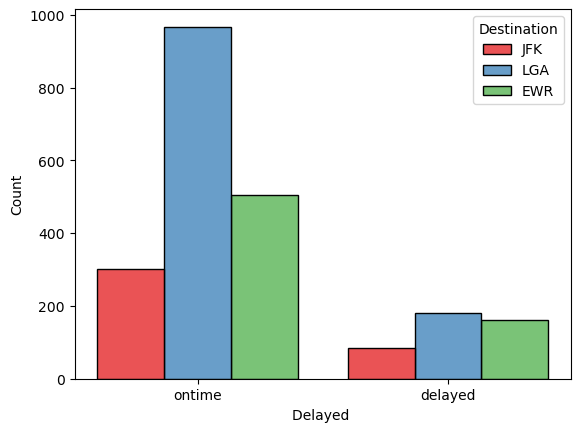

In [24]:
sns.histplot(data=df,x='Delayed ',hue='Destination',multiple='dodge',shrink=.8,palette='Set1')
plt.show()

- The flights having destination `LGA (LaGuardia)` were mostly both on time and delayed followed by flights having destination `EWR (Newark)` and ` JFK (Kennedy)`.

----

----

## Model Building

#### Feature Selection
>Feature selection is important in ML as it reduces overfitting, improves model performance, enhances interpretability, and reduces computational complexity. It helps select only the most relevant features for predicting the target variable, leading to better accuracy and faster processing times.

In this model, `five` features are selected:
 - Day of the Week
 - Departure Time
 - Origin
 - Destination
 - Carrier

And `one` target variable is selected:
- Delayed 

In [25]:

flight= df.loc[:,['Day of the Week','Departure Time','Origin','Destination','Carrier','Delayed ']]
flight


,Day of the Week,Departure Time,Origin,Destination,Carrier,Delayed
0,4,1455,BWI,JFK,OH,ontime
1,4,1640,DCA,JFK,DH,ontime
2,4,1245,IAD,LGA,DH,ontime
3,4,1709,IAD,LGA,DH,ontime
4,4,1035,IAD,LGA,DH,ontime
...,...,...,...,...,...,...
2194,6,644,DCA,EWR,RU,ontime
2195,6,1653,IAD,EWR,RU,ontime
2196,6,1558,DCA,EWR,RU,ontime
2197,6,1403,DCA,EWR,RU,ontime


----
#### Data preprocessing

In `Departure Time`, the time is represented in **24 hour** format.
 - eg- 1455 represents **14 hour and 55 minutes** <br> 

 Retaining only the hour and removing minutes from the `Departure Time`

In [26]:
flight['Departure Time']=flight['Departure Time'].astype(str).str.zfill(4).str[:2] .astype(int)
flight

,Day of the Week,Departure Time,Origin,Destination,Carrier,Delayed
0,4,14,BWI,JFK,OH,ontime
1,4,16,DCA,JFK,DH,ontime
2,4,12,IAD,LGA,DH,ontime
3,4,17,IAD,LGA,DH,ontime
4,4,10,IAD,LGA,DH,ontime
...,...,...,...,...,...,...
2194,6,6,DCA,EWR,RU,ontime
2195,6,16,IAD,EWR,RU,ontime
2196,6,15,DCA,EWR,RU,ontime
2197,6,14,DCA,EWR,RU,ontime


----
#### Encoding the categorical variables

>Encoding categorical variables is important in machine learning because most algorithms require numeric input, and categorical variables can have a significant impact on the output of a model. The appropriate encoding technique needs to be chosen carefully to avoid biased or inaccurate results.

In [27]:
df['Delayed '].unique()

array(['ontime', 'delayed'], dtype=object)

**Label encoding :**
   > Label encoding is a technique for converting categorical data into numerical data. It assigns a unique numerical value to each category in the data, such that similar categories have similar values.

The target column `Delayed` is encoded using **Label Encoder** as
- delayed - 0
- ontime - 1




In [28]:
from sklearn.preprocessing import LabelEncoder
lbl= LabelEncoder()
flight.loc[:,'Delayed ']=lbl.fit_transform(flight['Delayed '])


---
**Target Encoding :**

>Target encoding replaces each category in a categorical variable with the average value of the target variable for that category.

`Origin`, `Destination`, `Carrier` - These categorical variables are encoded using target encoding

In [29]:
from category_encoders import TargetEncoder
trgt= TargetEncoder()
flight.loc[:,['Origin','Destination','Carrier']]=trgt.fit_transform(flight[['Origin','Destination','Carrier']],flight['Delayed '])
flight

,Day of the Week,Departure Time,Origin,Destination,Carrier,Delayed
0,4,14,0.744828,0.782383,0.850425,1
1,4,16,0.838686,0.782383,0.754098,1
2,4,12,0.754386,0.842334,0.754098,1
3,4,17,0.754386,0.842334,0.754098,1
4,4,10,0.754386,0.842334,0.754098,1
...,...,...,...,...,...,...
2194,6,6,0.838686,0.757895,0.769608,1
2195,6,16,0.754386,0.757895,0.769608,1
2196,6,15,0.838686,0.757895,0.769608,1
2197,6,14,0.838686,0.757895,0.769608,1


---
Storing the features in `x` variable

In [30]:
x=flight.drop(columns='Delayed ')
x

,Day of the Week,Departure Time,Origin,Destination,Carrier
0,4,14,0.744828,0.782383,0.850425
1,4,16,0.838686,0.782383,0.754098
2,4,12,0.754386,0.842334,0.754098
3,4,17,0.754386,0.842334,0.754098
4,4,10,0.754386,0.842334,0.754098
...,...,...,...,...,...
2194,6,6,0.838686,0.757895,0.769608
2195,6,16,0.754386,0.757895,0.769608
2196,6,15,0.838686,0.757895,0.769608
2197,6,14,0.838686,0.757895,0.769608


In [31]:
x.describe()

,Day of the Week,Departure Time,Origin,Destination,Carrier
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,3.906321,13.329695,0.806276,0.806276,0.805942
std,1.902862,4.446117,0.041734,0.038569,0.071423
min,1.000000,5.000000,0.744828,0.757895,0.723455
25%,2.000000,10.000000,0.754386,0.757895,0.754098
50%,4.000000,14.000000,0.838686,0.842334,0.769608
75%,5.000000,17.000000,0.838686,0.842334,0.878866
max,7.000000,23.000000,0.838686,0.842334,0.913366


In [32]:
x.columns

Index(['Day of the Week', 'Departure Time', 'Origin', 'Destination',
       'Carrier'],
      dtype='object')

In [33]:
x.isna().sum()

Day of the Week    0
Departure Time     0
Origin             0
Destination        0
Carrier            0
dtype: int64

Storing target variable in `y` variable.

In [34]:
y=flight['Delayed ']
y

0       1
1       1
2       1
3       1
4       1
       ..
2194    1
2195    1
2196    1
2197    1
2198    1
Name: Delayed , Length: 2199, dtype: int32

----
#### Split data into train and test set

- Training data - `2100` rows
- Testing data - `99` rows

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=99,random_state=1)

In [112]:
print('x_train:',len(x_train))
print('x_test:',len(x_test))
print('y_train:',len(y_train))
print('y_test:',len(y_test))

x_train: 2100
x_test: 99
y_train: 2100
y_test: 99


---
### Training Model

**Naive Bayes :**  
- Naive Bayes is a machine learning algorithm used for classification tasks. It is based on Bayes' theorem and assumes that features are independent of each other. 
$$ P(a|b) = (P(b|a) * P(a)) / P(b) $$

      -  P(a|b) is the posterior probability of a given b
      -  P(b|a) is the conditional probability of b given a
      -  P(a) is the prior probability of a
      -  P(b) is the marginal probability of b.

- There are three types of Naive Bayes classifiers:
    - Gaussian Naive Bayes : used for continuous data
    - Multinomial Naive Bayes : used for discrete data
    - Bernaulli Naive Bayes : used for binary data  
  <br>   
- Since the data is continuous, **GaussianNB** is used here.

Training the model with training data.

In [113]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

Predicting the result using trained model

In [114]:
y_predict=gnb.predict(x_test)
y_predict[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
y_actual = y_test
y_actual[:10]

1276    1
1656    0
335     1
1457    1
1956    0
1537    1
389     1
1777    0
2003    1
403     1
Name: Delayed , dtype: int32

Accuracy score of the trained model

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8181818181818182

Confusion matrix
>Confusion matrix is a table that is often used to evaluate the performance of a classifier. It shows the counts of true and false predictions for each class.

In [117]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_predict)
cm

array([[ 2, 15],
       [ 3, 79]], dtype=int64)

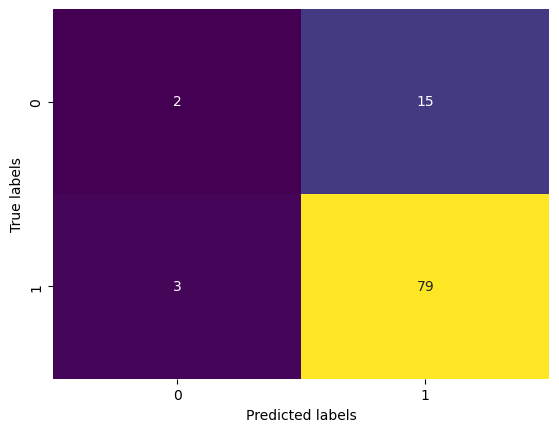

In [120]:
sns.heatmap(cm, annot=True,cmap='viridis',cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

- `0` - delayed
- `1` - ontime 

 In one instance, out of 17 samples, the model made 15 false predictions and only 2 true predictions. In another instance, out of 83 samples, the model made 3 false predictions and 79 true predictions. These results provide valuable insights into the performance of the model and can be used to make improvements.

----